In [47]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import matplotlib
from matplotlib import pyplot as plt
import cv2
import json
import numpy as np
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [49]:
def draw_poly_org(p1,image1,color):
    image=image1.copy()
    mask=np.zeros(image.shape[:2],np.uint8)
    p1=[int(i) for i in p1]
    p2=[]
    for p in range(int(len(p1)/2)):
        p2.append([p1[2*p],p1[2*p+1]])
    fill_pts = np.array([p2], np.int32)
    cv2.fillPoly(mask, fill_pts, 255)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)     
    cv2.drawContours(image, contours, -1, color, 2)    
    return image,contours

In [20]:
config_file = '../configs/detectors/dent_detector_updated_segm.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../data/crack_latest_mmdet_model2/epoch_14.pth'

In [21]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

2021-01-07 10:37:33,381 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

missing keys in source state_dict: layer2.0.conv2.weight_diff, layer2.0.conv2.switch.weight, layer2.0.conv2.switch.bias, layer2.0.conv2.pre_context.weight, layer2.0.conv2.pre_context.bias, layer2.0.conv2.post_context.weight, layer2.0.conv2.post_context.bias, layer2.0.conv2.offset_s.weight, layer2.0.conv2.offset_s.bias, layer2.0.conv2.offset_l.weight, layer2.0.conv2.offset_l.bias, layer2.0.rfp_conv.weight, layer2.0.rfp_conv.bias, layer2.1.conv2.weight_diff, layer2.1.conv2.switch.weight, layer2.1.conv2.switch.bias, layer2.1.conv2.pre_context.weight, layer2.1.conv2.pre_context.bias, layer2.1.conv2.post_context.weight, layer2.1.conv2.post_context.bias, layer2.1.conv2.offset_s.weight, layer2.1.conv2.offset_s.bias, layer2.1.conv2.offset_l.weight, layer2.1.conv2.offset_l.bias, layer2.2.conv2.weight_diff, layer2.2.conv2.switch.weight, layer2

In [22]:
test_json='/mmdetection/data/crack_latest/annotations/crack_test_new.json'
img_dir='/mmdetection/data/crack_latest/images/'

with open(test_json) as f:
    data = json.load(f)

In [55]:
index=7

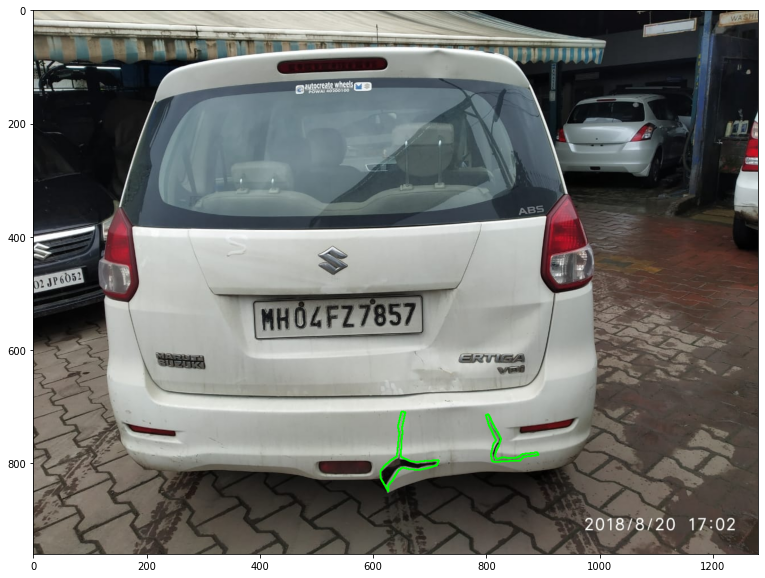

In [56]:
plt.figure()
file_name = data['images'][index]['file_name']
img=cv2.imread(img_dir+file_name)    
image_new_org=img.copy()
for j in range(len(data['annotations'])):
    if data['annotations'][j]['image_id']==data['images'][index]['id']:
        p1=data['annotations'][j]['segmentation'][0]
        image_new_org,_=draw_poly_org(p1,image_new_org,(0,255,0))
plt.imshow(cv2.cvtColor(image_new_org, cv2.COLOR_BGR2RGB))
plt.show()

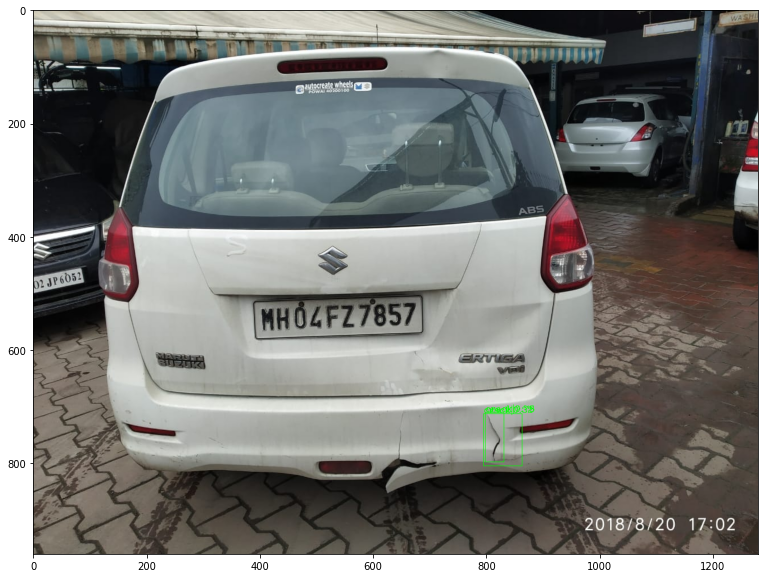

In [57]:
plt.figure()
file_name = data['images'][index]['file_name']
img = cv2.imread(img_dir + file_name)
result = inference_detector(model, img)
# show the results
out=show_result_pyplot(model, img, result)
plt.imshow(cv2.cvtColor(out[0], cv2.COLOR_BGR2RGB))
plt.show()

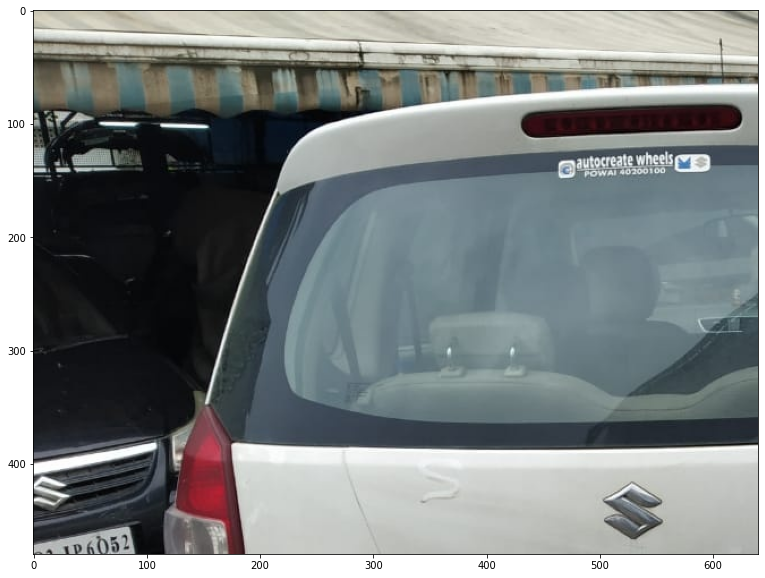

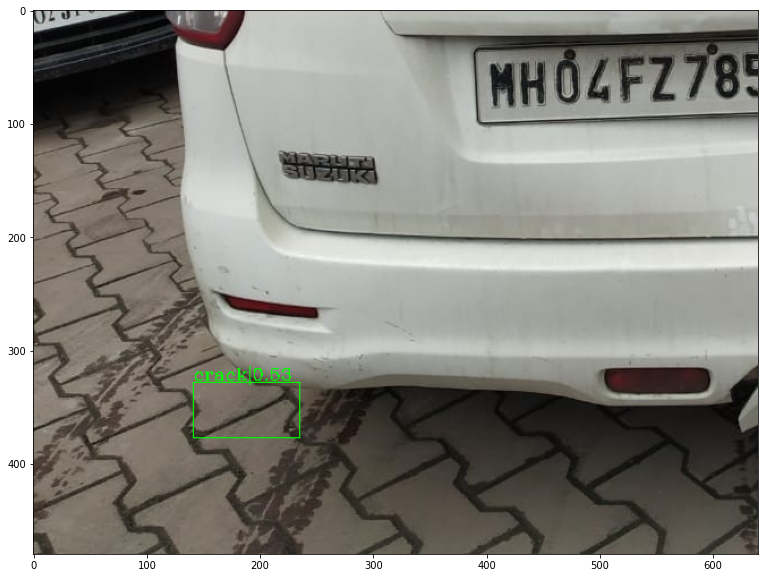

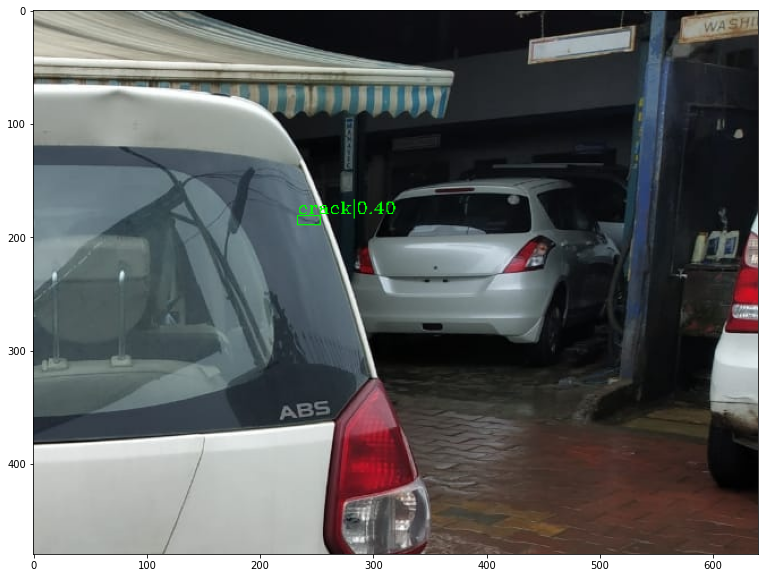

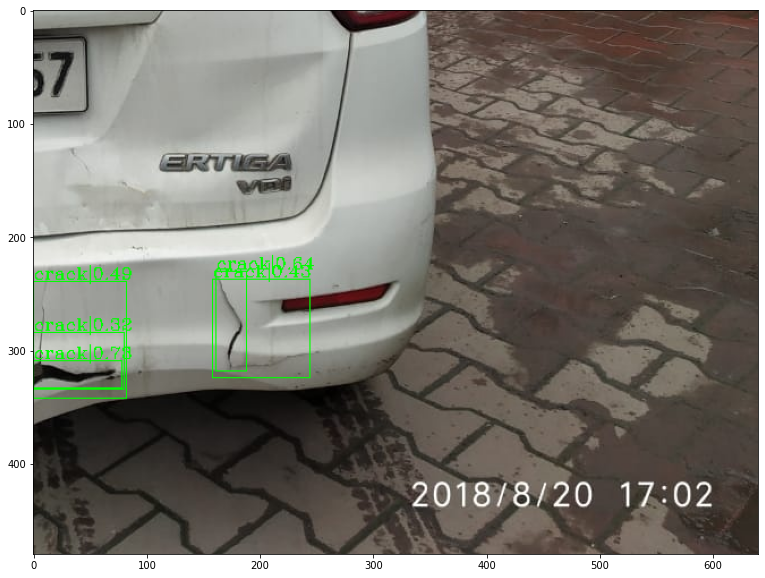

In [58]:
file_name = data['images'][index]['file_name']
img = cv2.imread(img_dir + file_name)
h,w=img.shape[:2]
img1=img[0:int(h/2),0:int(w/2)]
img2=img[int(h/2):h,0:int(w/2)]
img3=img[0:int(h/2),int(w/2):w]
img4=img[int(h/2):h,int(w/2):w]

for im in [img1,img2,img3,img4]:
    result = inference_detector(model, im)
    # show the results
    out=show_result_pyplot(model, im, result)
    plt.imshow(cv2.cvtColor(out[0], cv2.COLOR_BGR2RGB))
    plt.show()